# Gradiant Calculation in Neural Network with Karpathy's Micrograd

*Summary of Karpathy's Video Lecture on Micrograd*


In this blog post, we’ll explore how gradients are calculated in neural networks, based on Karpathy’s insightful lecture and his Micrograd library. Gradients play a crucial role in optimizing the performance of neural networks, and understanding how they work is key to grasping backpropagation and network training.

### What is a Gradient?

A gradient, in the context of neural networks, is essentially the derivative of a function. It tells us how a small change in the input affects the output of the network. When training a neural network, we want to minimize the error between the network's prediction and the actual value, and gradients guide us in adjusting the network’s parameters (weights) to achieve this goal.

### How Derivatives is Calculated

Derivatives is the basis for calculating gradients. There are different approaches to perform differentiation, but in neural networks, two common methods are used: **analytical differentiation** and **numerical differentiation**.

### Differentiation Approaches

1. **Analytical Approach**  
   In the analytical approach, we use calculus to derive exact formulas for the gradients. This method involves applying rules of differentiation (such as the chain rule) directly to the function that represents our neural network. It’s precise but can be computationally complex for large networks with many parameters.

2. **Numerical Approach**  
   The numerical approach approximates the gradient by evaluating how the function changes with small perturbations in the input. One common way to compute numerical differentiation is using limits. We can estimate the gradient by calculating how the output changes as we make tiny adjustments to the input and divide this change by the size of the adjustment.

   - **Using Limit**:  
     In the numerical approach, we rely on the concept of limits to estimate the gradient. For a function \( f(x) \), the derivative can be approximated as:
     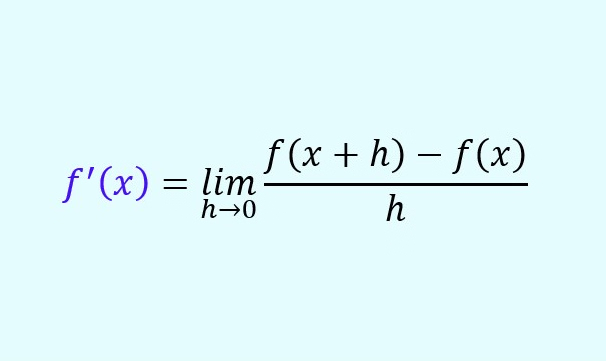
     
Lets first try to undestand these two approches for of calculating derivates with the help of code.

Suppose we have given a function y = f(x) = 3x^2 -4x + 5 now find the derivate of it with the help of both approches and plot the graphs.

**Analytical Approach** . 

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import HTML

# function given
# y = 3x^2 -4x + 5
def f(x):
    return 3*x**2-4*x+5

# derivative of function y = f(x)
def D_f(x):
    return 6*x-4

# if x  = 3.0 find the value of f(x)
y = f(3.0)
print(f"function y = 3x^2 -4x + 5 for x = 3.0")
print(f"y = {y}")

y1 = D_f(3.0)

print(f"y'= {y1}")


function y = 3x^2 -4x + 5 for x = 3.0
y = 20.0
y'= 14.0


**Numerical Approach** 

In [27]:
# function given
# y = 3x^2 -4x + 5
def f(x):
    return 3*x**2-4*x+5

# derivative of function y = f(x)
def ND_f(x):
    h = 0.000001
    y1 = (f(x + h) - f(x))/h
    return y1

# if x  = 3.0 find the value of f(x)
y = f(3.0)
print(f"function y = 3x^2 -4x + 5 for x = 3.0")
print(f"y = {y}")

y1 = ND_f(3.0)
print(f"Numerical approach: y'= {y1}")
y1 = D_f(3.0)
print(f"analytical approach: y'= {y1}")


function y = 3x^2 -4x + 5 for x = 3.0
y = 20.0
Numerical approach y'= 14.000003002223593
analytical approach y'= 14.0


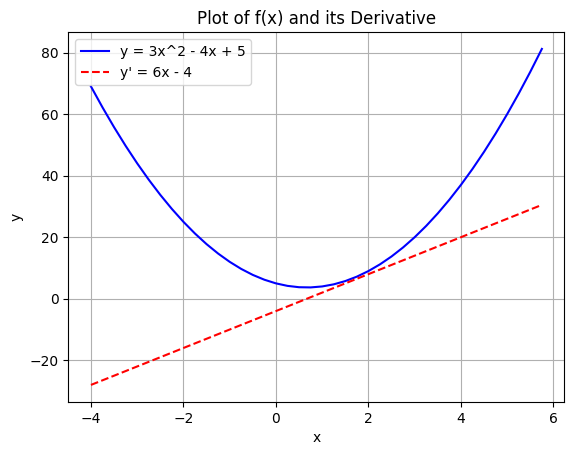

In [25]:
# # plot a graph for the function f(x)
# Range of x values
xs = np.arange(-4, 6, 0.25)
# Compute y values for f(x) and f'(x)
y = f(xs)
y1 = D_f(xs)

# Plot the function f(x)
plt.plot(xs, y, label="y = 3x^2 - 4x + 5", color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of f(x) and its Derivative")
plt.legend()

# Plot the derivative f'(x)
plt.plot(xs, y1, label="y' = 6x - 4", color='r', linestyle='--')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


**Conclusion**

    function y = 3x^2 -4x + 5 for x = 3.0
    y = 20.0
    y'= 14.0

1. Numerical Interpretation: A derivative of 14 at x=3 indicates that if you slightly increase x by 0.1, the value ofy will increase by roughly 14×0.1=1.4. Meaning: The derivative tells us the slope of the function at the point x=3. A slope of 14 means that the function is steeply increasing at that point, so small changes in x will result in significant increases in y.

2. from both the approches we can conclude that if the mathematical expression grows its difficult to implement it in code as compare to numerical approch.



**Experiment**
    
1. lets assume you hv to calculate derivate of y  wrt x: 
    y = f(x)= 3 * x^2 -4 * x + 5   -----------equ1


        I can write it as below:

        f1 = a * (x*x) - b * x + c    -------------equ2

        now I have a,b,c,d 4 variables. 
        now suppose I put a,b,c as constant and x as variable:

        a = 3
        b = 4
        c = 5  

        f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 

        Lets h = 0.000001 (small value near to 0)

        f2 = f1(x+h) = a * (x+h)*(x+h) - b * (x+h) + c    -------------equ3 


        now lets implement it with code for derivativ. 

        dv = f1(x+h) - f(x) / h   where h-->0

        dv = f2- f1 / h

        you can take anyone out of x,a,b,c as variable and others as constant in equn1 for calculating derivative of y wrt to that variable keeping others as constant. and 1st calculate the f2 value. 

        f1 = f1(x) = a * (x*x) - b * x + c -----equ1

        derivative of y wrt a:
        f2 = (a+h) * (x*x) - b * x + c
        dv = f2- f1 / h

        derivative of y wrt b:
        f2 = a * (x*x) - (b+h) * x + c
        dv = f2- f1 / h

        derivative of y wrt c:
        f2 = (a) * (x*x) - b * x + (c+h)
        dv = f2- f1 / h

now lets code it first and then draw some conclusions.


    

In [54]:
print(f"y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 ")

a = 3
b = 4
c = 5 
x= 3
h = 0.000001  # should be small value.

print(f"a:{a}")
print(f"b:{b}")
print(f"c:{c}")
print(f"x:{x}")




# function y = f(x):
f1 = a * (x*x) - b * x + c

print(f"value of function y = {f1}")
print(f"Derivative of y wrt to x = {x}")

# function y = f(x+h):
f2 = a * (x+h)*(x+h) - b * (x+h) + c

# derivate :
y1 = (f2-f1)/h

print(f"f1: {f1}")
print(f"f2: {f2}")
print(f"Dv: {y1}")



print(f"Derivative of y wrt to a = {a}")
# function y = f(a):
f1 = a * (x*x) - b * x + c

# function y = f(a+h):
f2 = (a+h) * (x*x) - b * x + c

# derivate :
y1 = (f2-f1)/h

print(f"f1: {f1}")
print(f"f2: {f2}")
print(f"Dv: {y1}")


print(f"Derivative of y wrt to b = {b}")

# function y = f(a):
f1 = a * (x*x) - b * x + c

# function y = f(a+h):
f2 = (a) * (x*x) - (b+h) * x + c
# derivate :
y1 = (f2-f1)/h
print(f"f1: {f1}")
print(f"f2: {f2}")
print(f"Dv: {y1}")

print(f"Derivative of y wrt to c = {c}")
# function y = f(a):
f1 = a * (x*x) - b * x + c
# function y = f(a+h):
f2 = (a) * (x*x) - b * x + (c+h)
# derivate :
y1 = (f2-f1)/h
print(f"f1: {f1}")
print(f"f2: {f2}")
print(f"Dv: {y1}")

y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 
a:3
b:4
c:5
x:3
value of function y = 20
Derivative of y wrt to x = 3
f1: 20
f2: 20.000014000003
Dv: 14.00000299867088
Derivative of y wrt to a = 3
f1: 20
f2: 20.000009000000002
Dv: 9.00000000214618
Derivative of y wrt to b = 4
f1: 20
f2: 19.999997
Dv: -2.9999999995311555
Derivative of y wrt to c = 5
f1: 20
f2: 20.000001
Dv: 1.0000000010279564


### Explanation of effect of value c on y:

    y = a * (x*x) - b * x + c   
    where
        a = 3
        b = 4
        c = 5
        
    Derivative of y wrt to b = 4
    f1: 20
    f2: 19.999997
    Dv: -2.9999999995311555
    
    **conclusion**
         if b is changes by 1 unit the fun y will change by -3 units .
         delta y / delta c = -3
         lets for b= 4  y = 20
         if b = 4+1 = 5   than y = 20 -3 = 17
         
         A small change of unit 1 in ( b ) decreases the function y by 3 units i.e y will become 17.

### Summary of results
    y = a * (x*x) - b * x + c   
    where
        a = 3
        b = 4
        c = 5 

These derivatives describe how sensitive the output of the function is to changes in each variable. For example:
- The function changes rapidly with respect to \( x \) (slope of 14).
- A small change in \( a \) causes the function to change by 9 units.
- A small change in \( b \) decreases the function by 3 units.
- A change in \( c \) directly increases or decreases \( y \) by 1 unit.

The `Value` class in Andrej Karpathy's *Micrograd* library is a key component that helps in building and backpropagating through computational graphs for automatic differentiation. It's designed to represent a scalar value in a neural network while tracking operations performed on it to compute gradients during backpropagation.

### Key Features of the `Value` Class in karpathy micrograd:
0. **Stores a Scalar**: Each instance of the `Value` class holds a scalar value (a single number), which can be a result of any operation.

1. **Mathematical Operators**: Each instance of the `Value` class holds a scalar value, and the class overloads mathematical operators (like `+`, `-`, `*`, `/`) to support various operations between `Value` objects. These operations not only perform standard arithmetic but also build a computational graph that tracks the sequence of operations. This enables automatic differentiation, where gradients can be calculated during backpropagation based on the chain rule.
   
2. **Tracks Gradients**: The class tracks the gradient of the scalar with respect to some objective (like loss) to facilitate backpropagation. This is essential in training neural networks to minimize loss functions.

3. **Operation Tracking**: It records operations performed on `Value` objects (such as addition, multiplication, etc.) in a computational graph. This allows for automatic differentiation when computing gradients.

4. **Backpropagation**: The `Value` class has a method to perform backpropagation through the computational graph, propagating gradients from the final output back to the inputs.



### Step by Step micrograd class implementation:

now we will implement the micrograd class of karpathy step by step. So that will have a track of all the changes going on in the class

**Step1:**

    explains how to define a class.

    1. **`__repr__` Method**:
       - The `__repr__` method in Python is a special method that defines how an object is represented as a string.
       - It is primarily used for debugging and development, giving a detailed string representation of an object.
       - Ideally, the string produced by `__repr__` should provide enough information to recreate the object or give insight into its state.

    2. **`__add__` Method**:
       - The `__add__` method allows you to customize how the `+` operator behaves when used with instances of a class.
       - By default, the `+` operator cannot be applied to custom objects unless the class defines its own `__add__` method.
       - This method lets you define specific behavior for combining or adding custom objects, making the `+` operator more flexible.

In [64]:
class abc:
    def __init__(self,data):
        self.data = data

    def __repr__(self) -> str:
        return f"abc(data = {self.data})"
    
a = abc(12)
a

#The __repr__ method in Python is a special method used to 
# define how an object should be represented as a string. 
# It’s primarily used to provide a string representation of 
# an object that is useful for debugging and development purposes. 
# he goal of __repr__ is to produce a string that can ideally 
# be used to recreate 
# the object or at least provide detailed information about it.



#The __add__ method in Python is a special (magic) method 
# that allows you to define how the + operator behaves when 
# used with instances of your class. By default, the + operator 
# cannot be used with custom objects unless you define __add__ in 
# the class.



abc(data = 12)

**Step2**
    
    now we will implement the basic mathmatical operators can be wriiten with the help of small sub expressions 


### Main Expression:
1. **Main Expression**: 
   \[
   y = a(x^2) - b(x) + c
   \]

### Sub-Expressions:
2. **Sub-Expressions**:
   - **Sub-Expression 1**: 
     \[
     x^2 = x \times x
     \]
   
   - **Sub-Expression 2**: 
     \[
     k = a \times x^2
     \]

   - **Sub-Expression 3**: 
     \[
     f = b \times x
     \]

   - **Sub-Expression 4**: 
     \[
     g = k + f
     \]

   - **Sub-Expression 5**: 
     \[
     y = g + c
     \]

In [ ]:
class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = self.data + other.data
        return Value(out,(self, other), "+")
    
    def __mul__(self, other):
        out = self.data* other.data
        return Value(out,(self,other), "*")
    

**Experiment**

    below experiment shows how any matmatical expression can be break in the combination of small expression
    
![image-2.png](attachment:image-2.png)
![image.png](attachment:image.png)

In [10]:
# below is graphical representation of above mathametical function   

In [11]:


print(f"y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 ")

a = 3
b = -4
c = 5 
x= 3
h = 0.000001  # should be small value.

a = Value(3.0, label= "a")
b = Value(-4.0, label= "b")
c = Value(5.0, label = "c")
x = Value(3.0, label= "x")

x2 = x*x ; x2.label = "x2"
f = b*x ; f.label = "f"
k = a*x2 ; k.label = "k"

g = k + f ; g.label = "g"
f1 =  g + c  ; f1.label = "f1"




print(f"y = f1  = a * (x*x) + (-b * x) + c")
print(f"y = f1  = (a *  x2) +   f     + c")
print(f"y = f1  =     k     +   f      + c")


print("\n")
print(f"a:{a}")
print(f"b:{b}")
print(f"c:{c}")
print(f"x:{x}")
print("\n")
print(f"x2 = x*x :{x2}")
print(f"k = a*x2 :{k}")
print(f"f = b*x :{f}")
print("\n")
print(f"y = f1 =  k+ f + c")
print(f"c = c   :{c}")
print(f"f = b*x :{f}")
print(f"k = a*x2 :{k}")
print(f"f1 = k + f + c : {f1}")

print("\n")
print(f"y = f1 =  g + c")
print(f"c = c   :{c}")
print(f"g = k+f :{g}")
print(f"f1 = g + c : {f1}")


print("\n")
print(f"y = f1 =  k+ f + c")
print(f"x2=:{x2} x2_op:{x2._op} x2_child:{x2._prev}")
print(f"k=:{k} k_op:{k._op} k_child:{k._prev}")

y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 
y = f1  = a * (x*x) + (-b * x) + c
y = f1  = (a *  x2) +   f     + c
y = f1  =     k     +   f      + c


a:Value(data=3.0)
b:Value(data=-4.0)
c:Value(data=5.0)
x:Value(data=3.0)


x2 = x*x :Value(data=9.0)
k = a*x2 :Value(data=27.0)
f = b*x :Value(data=-12.0)


y = f1 =  k+ f + c
c = c   :Value(data=5.0)
f = b*x :Value(data=-12.0)
k = a*x2 :Value(data=27.0)
f1 = k + f + c : Value(data=20.0)


y = f1 =  g + c
c = c   :Value(data=5.0)
g = k+f :Value(data=15.0)
f1 = g + c : Value(data=20.0)


y = f1 =  k+ f + c
x2=:Value(data=9.0) x2_op:* x2_child:{Value(data=3.0)}
k=:Value(data=27.0) k_op:* k_child:{Value(data=3.0), Value(data=9.0)}


**Experiment**
    
    below code calculates the derivate of y wrt x,a,b,c using numerical approch

In [6]:
# calculate derivate: wrt to x

def lol():
    print(f"y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 ")

    h = 0.000001  # should be small value.

    a = Value(3.0, label= "a")
    b = Value(-4.0, label= "b")
    c = Value(5.0, label = "c")
    x = Value(3.0, label= "x")

    x2 = x*x ; x2.label = "x2"
    f = b*x ; f.label = "f"
    k = a*x2 ; k.label = "k"
    g = k + f ; g.label = "g"
    f =  g + c  ; f.label = "f"
    f1 = f.data


    a = Value(3.0, label= "a")
    b = Value(-4.0, label= "b")
    c = Value(5.0, label = "c")
    x = Value(3.0, label= "x")
    x.data = x.data + h

    x2 = x*x ; x2.label = "x2"
    f = b*x ; f.label = "f"
    k = a*x2 ; k.label = "k"
    g = k + f ; g.label = "g"
    f =  g + c  ; f.label = "f"
    f2 = f.data
    print(f"Derivative of y wrt to x = {x}")
    print((f2-f1)/h)

lol()


y = f1 = f1(x) = a * (x*x) - b * x + c    -------------equ2 
Derivative of y wrt to x = Value(data=3.000001)
14.000003002223593


### Graphical representation of Mathematical Expression

In [12]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f  }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


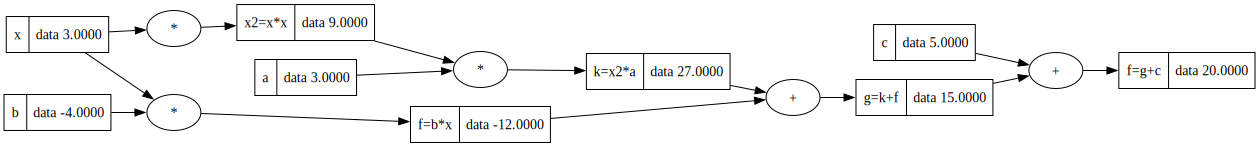

In [13]:
h = 0.000001  # should be small value.

a = Value(3.0, label= "a")
b = Value(-4.0, label= "b")
c = Value(5.0, label = "c")
x = Value(3.0, label= "x")

x2 = x * x ; x2.label = "x2=x*x"
f = b*x ; f.label = "f=b*x"
k = a*x2 ; k.label = "k=x2*a"
g = k + f ; g.label = 'g=k+f'   # k+ f + c
f = g + c  ; f.label = "f=g+c "


draw_dot(f)

In [14]:
svg_file_path = 'images/output1.svg'
img = display(HTML(f'<img src="{svg_file_path}" width="2000"/>'))  # Adjust width as needed


**EXPLANATUION**
 
     above fig shows how we have broken the expression in sub expresion and genrate an output of it.

### Understand the Gradient calculation in NN:

    Lets assume we have a NN of single neuron having weight a and bais c and the som activation f is applied to it and input to this N is b.
    NN equ is :
    
    #1. forward pass:
    
    Y_pred = (a*b +c)*f
    Y_true  = n
    
    Loss = Y_pred - Y_True
    L =   (a*b +c)*f - n
    assume True value n = 0
    then:
    
    L = (a*b +c)*f
    
    #2. Backward Pass:
    
    Grad Calculation:
    dL / da = ??
    dL / dc = ??
    
    Optimisation & Weight update:
    # gradiant decent algorithm:
    # Weight and Bais update
    a = a + -lr * dL / da
    c = c + -lr * dL / dc
   
    
    
    
    
    

In [ ]:
class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = self.data + other.data
        return Value(out,(self, other), "+")
    
    def __mul__(self, other):
        out = self.data* other.data
        return Value(out,(self,other), "*")
    



**Step a: Loss Claculation**

In [14]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
f = Value(-2.0, label='f')

#   L = (a*b +c)*f     

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
L = d * f; L.label = 'L'
L

Value(data=-8.0)

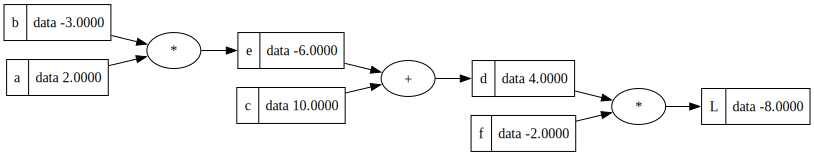

In [15]:
draw_dot(L)

In [7]:
svg_file_path = 'images/output2.svg'
display(HTML(f'<img src="{svg_file_path}" width="1000|"/>'))  # Adjust width as needed

**Step a: Manual Gradent Claculation**

In [17]:
# include gradiants

class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
        self.grad = 0.0
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = self.data + other.data
        return Value(out,(self, other), "+")
    
    def __mul__(self, other):
        out = self.data* other.data
        return Value(out,(self,other), "*")
    

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [39]:
# lets assume we have a a below neural net equation with diffrent values of variable:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
f = Value(-2.0, label='f')

#   L = (a*b +c)*f     

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
L = d * f; L.label = 'L'
L


Value(data=-8.0)

In [40]:
# now lets understand the process in neural net
# lets assume we have a below neural netork of layer 1 
#   for the forward propgation first we calculate a loss
#   L = (a*b +c)*f   
#   grad = 0.0        grad will be 0 
#   now will do the backward propgation 
#   dL/dw     basically the gradiant calculation  in computational graph
 
 

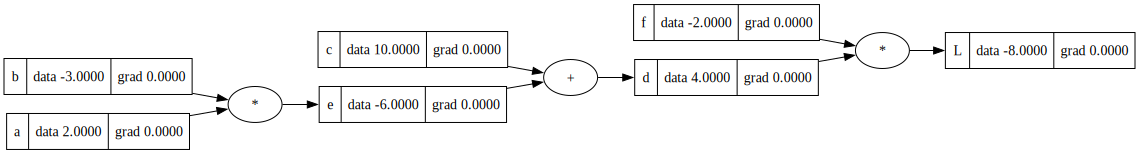

In [41]:
# we have an equation:
# L = (a*b + c) * f
# step1: calculate loss ( forward pass in computational graph)
draw_dot(L)
# in the below computational graph for the forward pass the all gradiants wrt all variables  are set to be 0

In [12]:
svg_file_path = 'images/output41.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

the gradiants would be Zero at the time of forward pass.so we have set it to zero as shown in above figure
now we will calculate first the gradiants manually applying chain rule concept using the sub functions of the loss function.

**Manual Gradent Claculation**

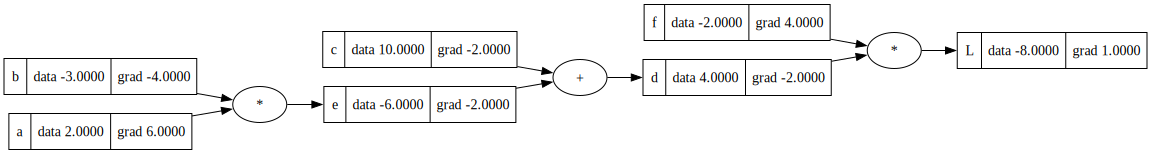

In [42]:
# step2: Backpropagation ( calcualte gradiant(derivate of each node wrt L) 
# starting from the end node and propagate it to begning using chain rule)
# claculate the gradiant ( derivatie of each node wrt end node L)

# a = Value(2.0, label='a')
# b = Value(-3.0, label='b')
# c = Value(10.0, label='c')
# f = Value(-2.0, label='f')


# eqn = L = (a*b + c)*f
#   e = a*b = -6
#   d = e+c = 4
#   L = d*f = -8

# derivate of L node wrt L :
# dL/dL = 1
L.grad = 1.0

# derivate of f node wrt L:
# dL/df = d = 4
f.grad = 4.0

# derivate of d wrt L:
# dL/dd = f = -2
d.grad = -2.0

# derivate of c wrt L:
#  dL/dc = dL/dd * dd/dc = f*1 = -2*1 = -2
c.grad = -2.0

# derivate of e wrt L:
#  dL/de = dL/dd * dd/de = f*1 = -2
e.grad = -2.0

# derivate of a wrt L:
# dL/da = dL/dd * dd/de *de/da   = f*1*b = -2*1*-3 = 6
a.grad = 6.0


# derivate of b wrt L:
# dL/db = dL/dd * dd/de *de/db   = f*1*b = -2*1*2 = -4
b.grad = -4.0


# now after back propgation plot graph all the gradiants got updated now 
draw_dot(L)


In [16]:
svg_file_path = 'images/output42.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

As you can see from the above dig that the gradiants now got updated after first round of back propgation.

### Conclusion

As you can see from the above diagram, the gradients have been updated after the first round of backpropagation. This indicates that the optimization process is actively adjusting the weights to minimize the loss function. 

1. Weight \(a\)** has a gradient of \(+6\). This means that if we want to decrease the loss, we need to decrease the value of \(a\). 

    In other words, a positive gradient suggests that increasing the weight \(a\) would lead to an increase in loss, so the optimal strategy would be to reduce \(a\) in order to effectively minimize the loss during the training process. 

This understanding of gradients and their impact on weight adjustments is fundamental to the training of neural networks, ensuring that the model learns effectively from the data provided.

### Proper Neural Network Implementation

#### weight updation equation in NN
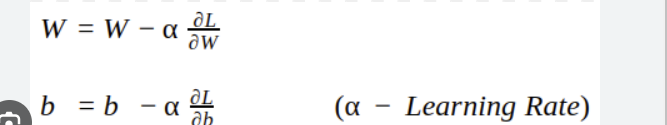

-7.286496


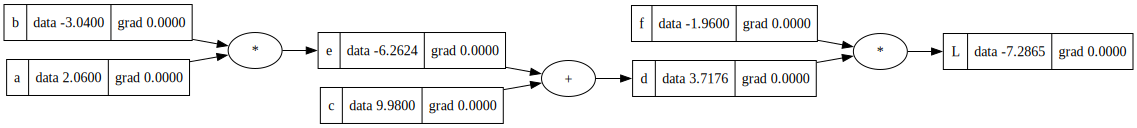

In [43]:
# weight updation euation in NN 
# w = w + learning rate * grad
a.data = a.data + 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b ; e.label = "e"
d = e + c ; d.label = "d"
L = d * f ; L.label = "L"

a.grad=0.0
b.grad=0.0
c.grad=0.0
f.grad=0.0
print(L.data)
draw_dot(L)

In [14]:
svg_file_path = 'images/output43.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

In [44]:
# now will do it for NN 

### basic NN :

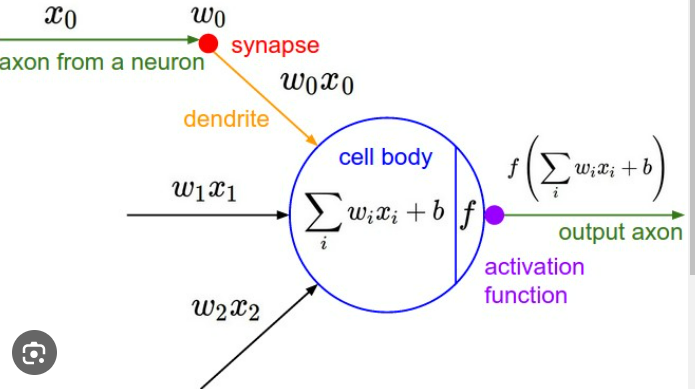

**NN equation for single neuron**

**Forward Pass**

    o = f(w1x1+w2x2 + b)   
    f = tanh()  # activation funcxtion
    o = tanh( w1x1+w2x2 + b)
    assume haivng only on e neuron

**loss**

    L = tanh( w1x1+w2x2 + b)

**Backward Pass**

    dL/dw1, dL/dw2  have to calculate
    weight updation:
    w1 = w1 + lr * dL/dw1
    w2 = w2 + lr * dL/dw2
    b = b + lr * dL/db

#### tanh formula 
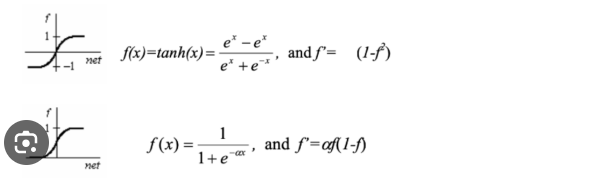
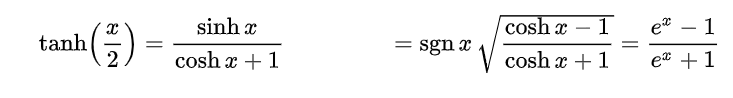

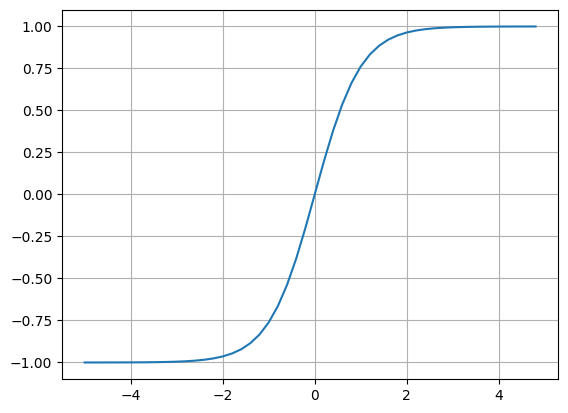

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [45]:
# empliment tanh function 
# include gradiants

class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
        self.grad = 0.0
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = self.data + other.data
        return Value(out,(self, other), "+")
    
    def __mul__(self, other):
        out = self.data* other.data
        return Value(out,(self,other), "*")
    
    def tanh(self):
        import math
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x)+ 1)
        out = Value(t, (self,), 'tanh')

        return out
    


In [53]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# o = x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
xw = x1w1 + x2w2; xw.label = 'x1*w1 + x2*w2'
n = xw + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476)

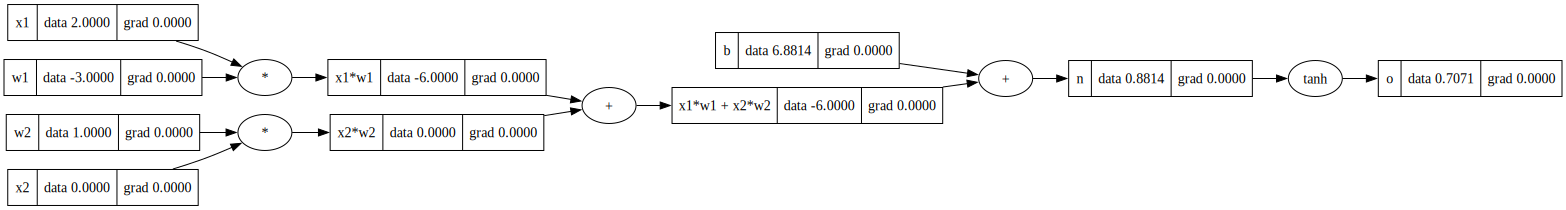

In [54]:
draw_dot(o)

In [15]:
from IPython.core.display import HTML
svg_file_path = 'images/output54.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

**manual Backpropagation**

In [55]:
# manual backpropagration
o.grad = 1.0
n.grad = 1- o.data**2
b.grad = n.grad * 1.0
xw.grad = n.grad *1.0
x1w1.grad = xw.grad * 1.0
x2w2.grad = xw.grad * 1.0
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data


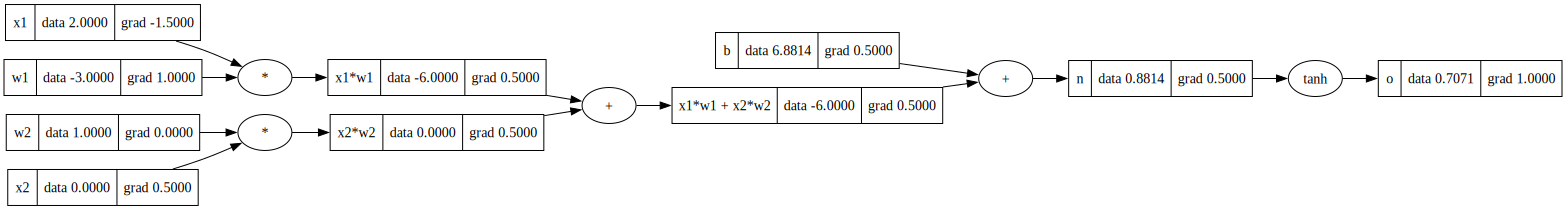

In [56]:
draw_dot(o)

In [1]:
from IPython.core.display import HTML
svg_file_path = 'images/output56.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

## auto backpropagation implimentation:

In [92]:
# auto backpropagation implimentation:


class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other): 
        out =  Value(self.data + other.data,(self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward  = _backward

        return out

    
    def __mul__(self, other):
        out = Value(self.data* other.data,(self,other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad 
        out._backward = _backward

        return out

    
    def tanh(self):
        import math
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x)+ 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1-t**2) * out.grad      
        out._backward = _backward

        return out
    


In [93]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# o = x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
xw = x1w1 + x2w2; xw.label = 'x1*w1 + x2*w2'
n = xw + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476)

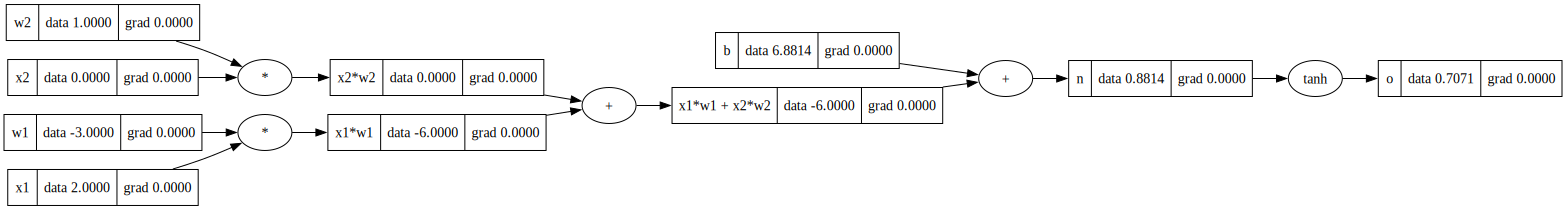

In [94]:
draw_dot(o)

In [2]:
from IPython.core.display import HTML
svg_file_path = 'images/output94.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

In [95]:
o.grad = 1.0

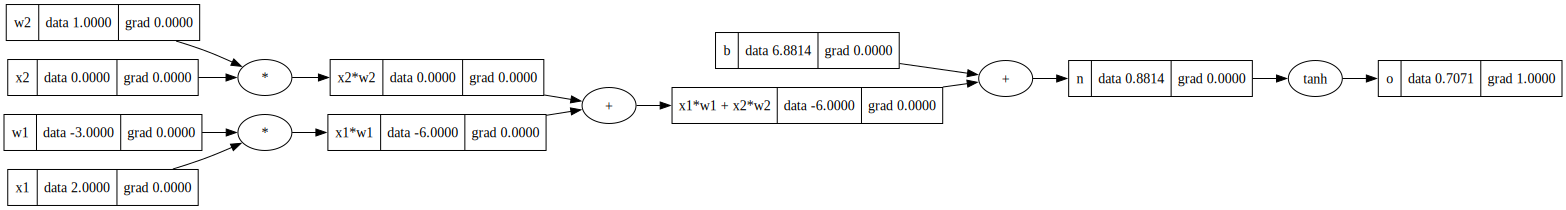

In [96]:
draw_dot(o)

In [3]:
from IPython.core.display import HTML
svg_file_path = 'images/output96.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

In [97]:
o._backward()

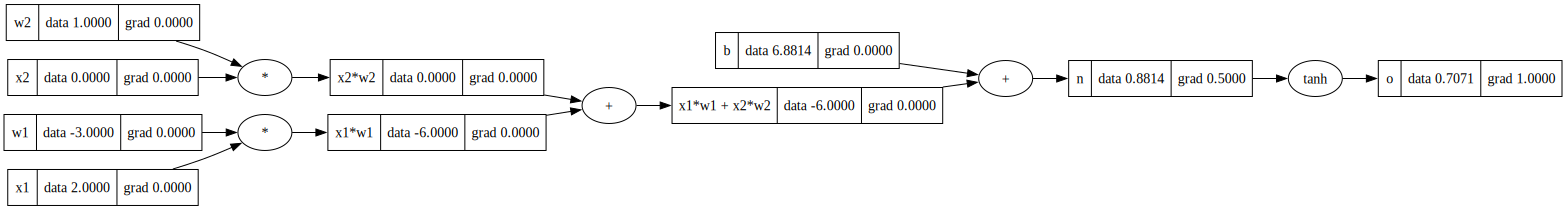

In [98]:
draw_dot(o)

In [4]:
from IPython.core.display import HTML
svg_file_path = 'images/output97.svg'
display(HTML(f'<img src="{svg_file_path}" width="10000"/>'))  # Adjust width as needed

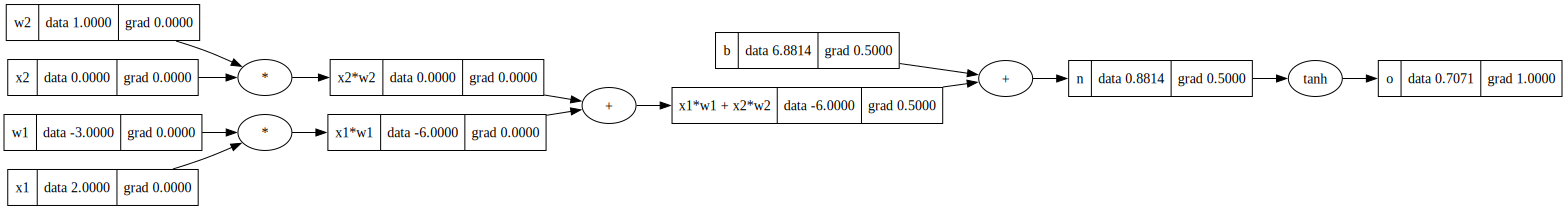

In [99]:
n._backward()
draw_dot(o)

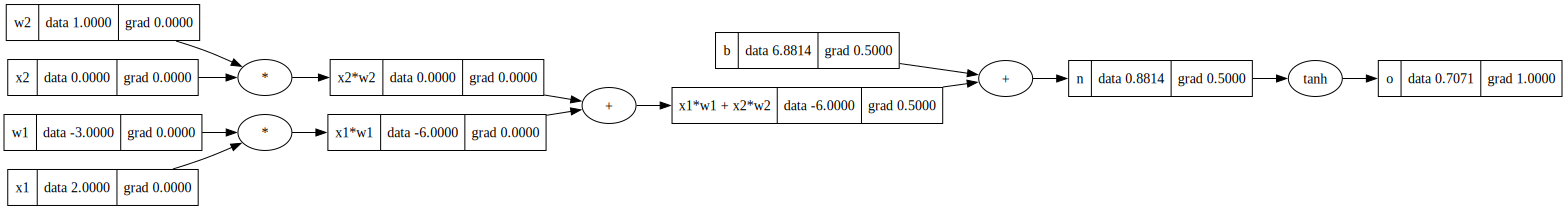

In [100]:
b._backward()
draw_dot(o)

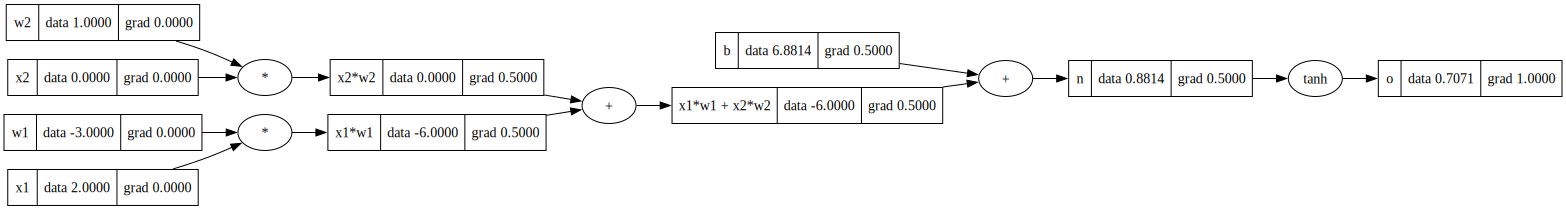

In [101]:
xw._backward()
draw_dot(o)

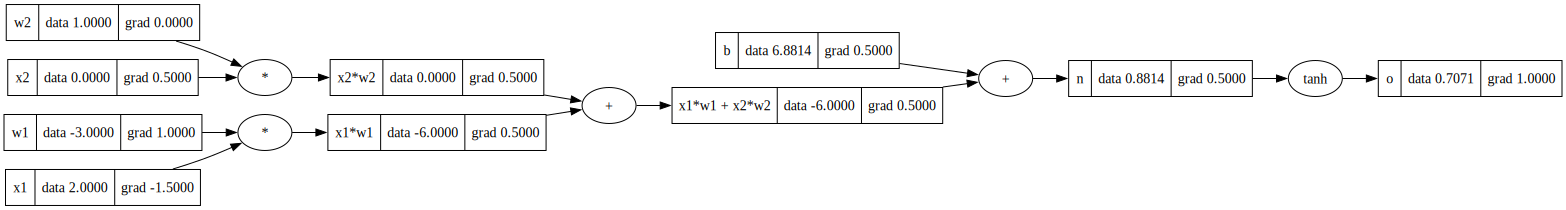

In [102]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

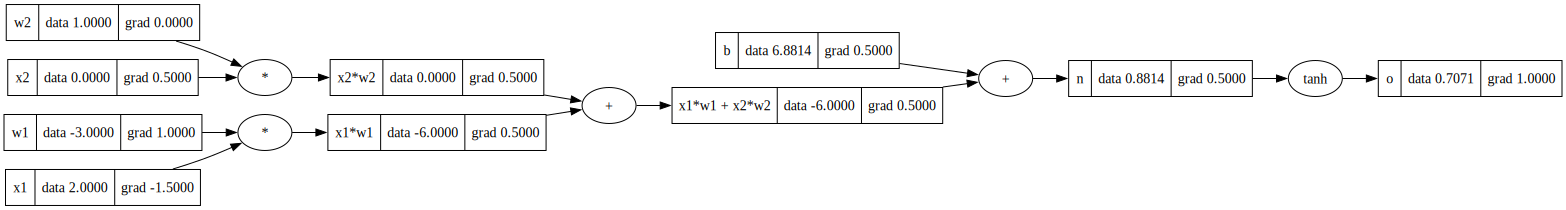

In [103]:

x2w2._backward()
x1w1._backward()
draw_dot(o)

## backward function implementation using topological sort

In [104]:
# now implementation of backward() using toplogical sort
# topological sort for doing backporp
# graph travers using topological sort traversal

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [109]:
# final version of class :
# auto backpropagation implimentation:

class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other): 
        out =  Value(self.data + other.data,(self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward  = _backward

        return out

    
    def __mul__(self, other):
        out = Value(self.data* other.data,(self,other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad 
        out._backward = _backward

        return out

    
    def tanh(self):
        import math
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x)+ 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1-t**2) * out.grad      
        out._backward = _backward

        return out
    

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    

In [110]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# o = x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
xw = x1w1 + x2w2; xw.label = 'x1*w1 + x2*w2'
n = xw + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476)

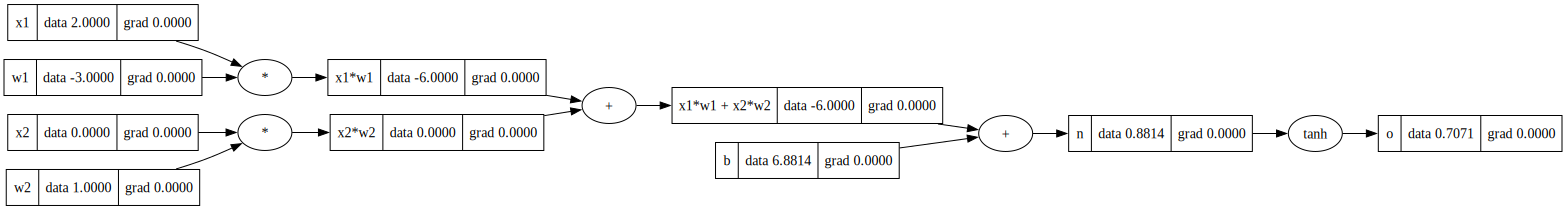

In [111]:
draw_dot(o)

In [112]:
o.backward()

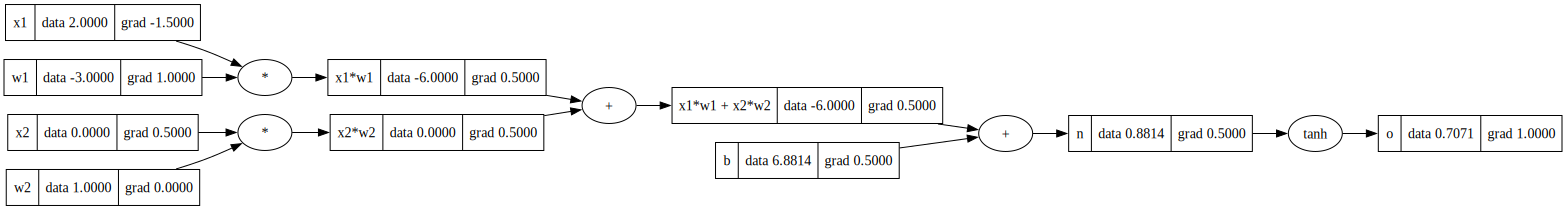

In [113]:
draw_dot(o)

## fix some bug in auto grad class

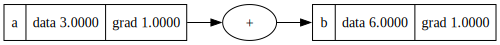

In [114]:
# fix some bug in auto grad class

# for example :
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

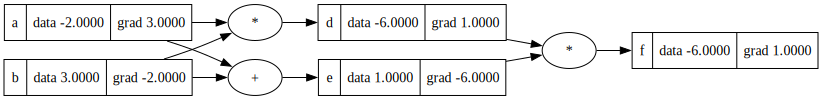

In [115]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [116]:
# so for above two cases the gradiants are not accumulating its getting override thats why the wrong values of grad has calculated ;
# now correct the class by simply accumulating the grads\

# final version of class :
# auto backpropagation implimentation:


class Value:
    def __init__(self,data, _children=(), _op="", label = ""):
        self.data = data
        self._op = _op
        self._prev = set(_children)
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None
   

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other): 
        out =  Value(self.data + other.data,(self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward  = _backward

        return out

    
    def __mul__(self, other):
        out = Value(self.data* other.data,(self,other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad 
        out._backward = _backward

        return out

    
    def tanh(self):
        import math
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x)+ 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1-t**2) * out.grad      
        out._backward = _backward

        return out
    

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    

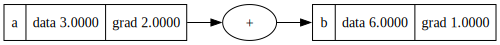

In [117]:
# for example :
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

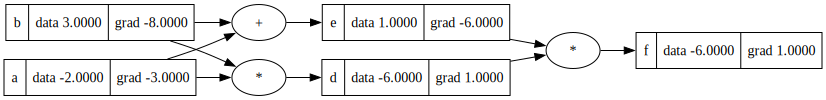

In [118]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [ ]:
# ------------------------end---------------------------------
# thanks!!
